# Oversampling and neural net


### Import Libraries and set constant random state 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [2]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline


### Read datasets

In [4]:
PCA_df = pd.read_csv(r"Sets/pca_3.csv",index_col=[0])
PCA_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,-0.099946,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,0.155708,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,0.159069,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,0.037839,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,-0.249445,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.657660,0.729199,-0.639379,0.014235,0.133790,-0.012341,0.578221,-0.173464,-0.132391,-0.040307,...,0.125742,0.031025,-0.127581,-0.092240,-0.084597,-0.005976,0.010087,0.086644,-0.047780,0.064984
1999,-0.326346,-0.283518,-0.013171,0.085992,0.112580,0.142915,0.355098,-0.170318,-0.290209,-0.250151,...,0.018072,-0.073200,-0.107384,0.037324,0.023242,0.009963,0.170823,0.098070,0.042203,-0.056280
2000,-0.211847,-0.293808,-0.109366,-0.112704,0.082216,-0.011944,0.378527,0.025612,-0.203169,0.315890,...,-0.081705,-0.005122,0.074399,-0.203843,-0.166209,-0.082116,-0.042335,0.021290,0.068202,-0.022748
2001,-0.334557,-0.315646,-0.028062,0.103931,-0.044717,0.070572,0.359556,-0.061466,-0.081412,0.241167,...,0.024980,0.011861,-0.003077,0.053481,0.203389,0.241135,-0.139370,-0.015324,-0.123194,-0.093305


In [5]:
df = pd.read_csv(r"Sets/drug_onehot_latest.csv")
df

,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,870258,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0
1999,870646,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
2000,879601,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0
2001,905163,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,0


### Run the Network

In [6]:
q = 'Nitroglycerin injection'

In [7]:
print("Running for :",q)
trainer = pd.concat([PCA_df, df[q]], axis = 1)

Running for : Nitroglycerin injection


In [8]:
# trainer

In [9]:
count_class_0, count_class_1 = trainer[q].value_counts()[0], trainer[q].value_counts()[1]

# Divide by class
df_class_0 = trainer[trainer[q] == 0]
df_class_1 = trainer[trainer[q] == 1]
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over[q].value_counts())
X = df_test_over.drop(q,axis='columns')
y = df_test_over[q]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
loss = keras.losses.BinaryCrossentropy()
weights = -1


Random over-sampling:
0    1801
1    1801
Name: Nitroglycerin injection, dtype: int64


In [10]:
# from keras.callbacks import History 
# history = History()

In [11]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='auto')

In [12]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(128, input_dim=46, activation='relu', kernel_regularizer='l2'))
# reg_model.add(Dense(128, activation='relu'))
# reg_model.add(Dropout(0.2))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(64, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='sigmoid'))
reg_model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])


his = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=100, verbose=0)

print(reg_model.evaluate(X_test, y_test))

y_preds = reg_model.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

23/23 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.9542
[0.33363330364227295, 0.9542302489280701]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       361
           1       0.92      1.00      0.96       360

    accuracy                           0.95       721
   macro avg       0.96      0.95      0.95       721
weighted avg       0.96      0.95      0.95       721



### Plot characteristic curves

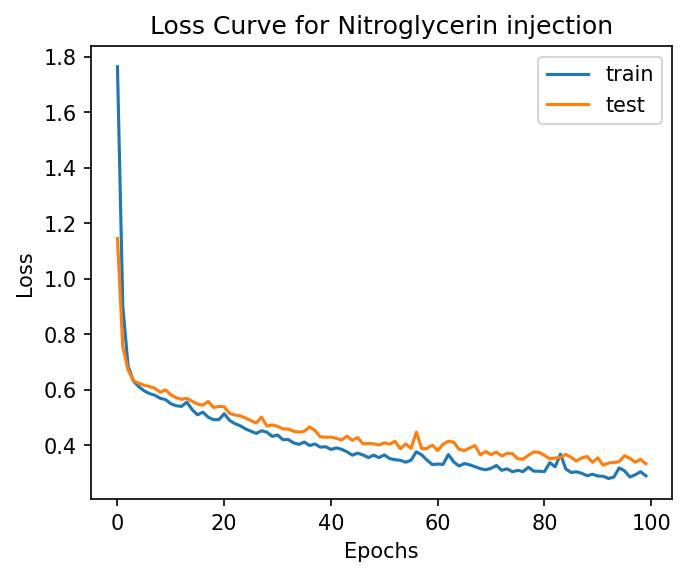

In [13]:
plt.figure(figsize=(5,4),dpi=150)
plt.plot(his.history['loss'], label='train')
plt.plot(his.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Loss Curve for Nitroglycerin injection')
plt.show()

In [14]:
#Predict on test set
predictions_NN_prob = reg_model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0)

In [15]:
#Print accuracy
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.9542302357836339


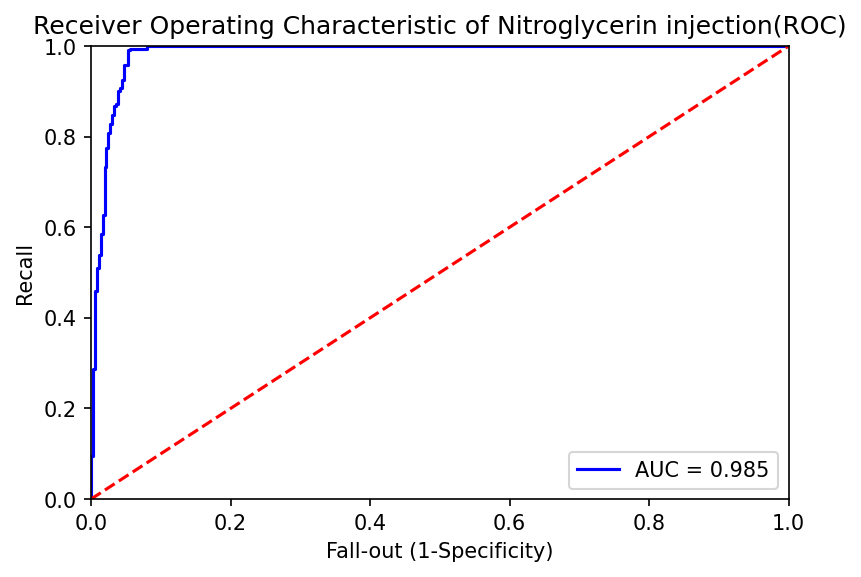

In [16]:
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure(dpi=150)
plt.title('Receiver Operating Characteristic of Nitroglycerin injection(ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

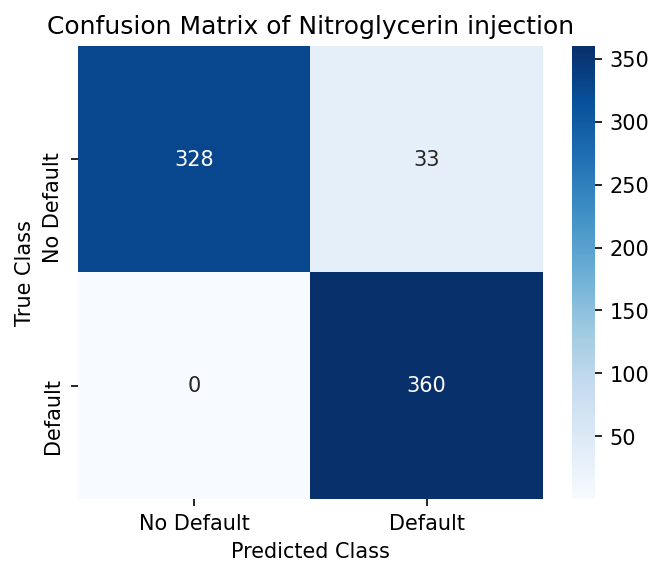

In [17]:
cm = confusion_matrix(y_test, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(5,4),dpi=150)
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix of Nitroglycerin injection')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()